In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Activation ,Dense, Conv2D, MaxPooling2D, Softmax, Dropout, Flatten
# from tensorflow.keras.activations import relu
from tensorflow.keras.initializers import zeros, TruncatedNormal
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import random as r
import pydot
import graphviz
import time

/home/mtizim/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mtizim/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mtizim/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mtizim/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
train = pd.read_csv("train.csv")
data = train.sample(frac=1).reset_index(drop=True)
split = int(len(train)*(0.7))
data_train = data[:split]
data_val = data[split:]


In [3]:
def vectorize(data,label=False):
    for l, v in data.iterrows():
        start = 1 if label else 0
        ar = v.as_matrix()[start:]
        yield np.reshape(np.array(ar),(28,28,1))
def onehot(num):
        x = np.zeros(10)
        x[num]=1.0
        return x
def labels(data):
        for l, v in data.iterrows():
                yield onehot(v[0])


/usr/lib/python3/dist-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


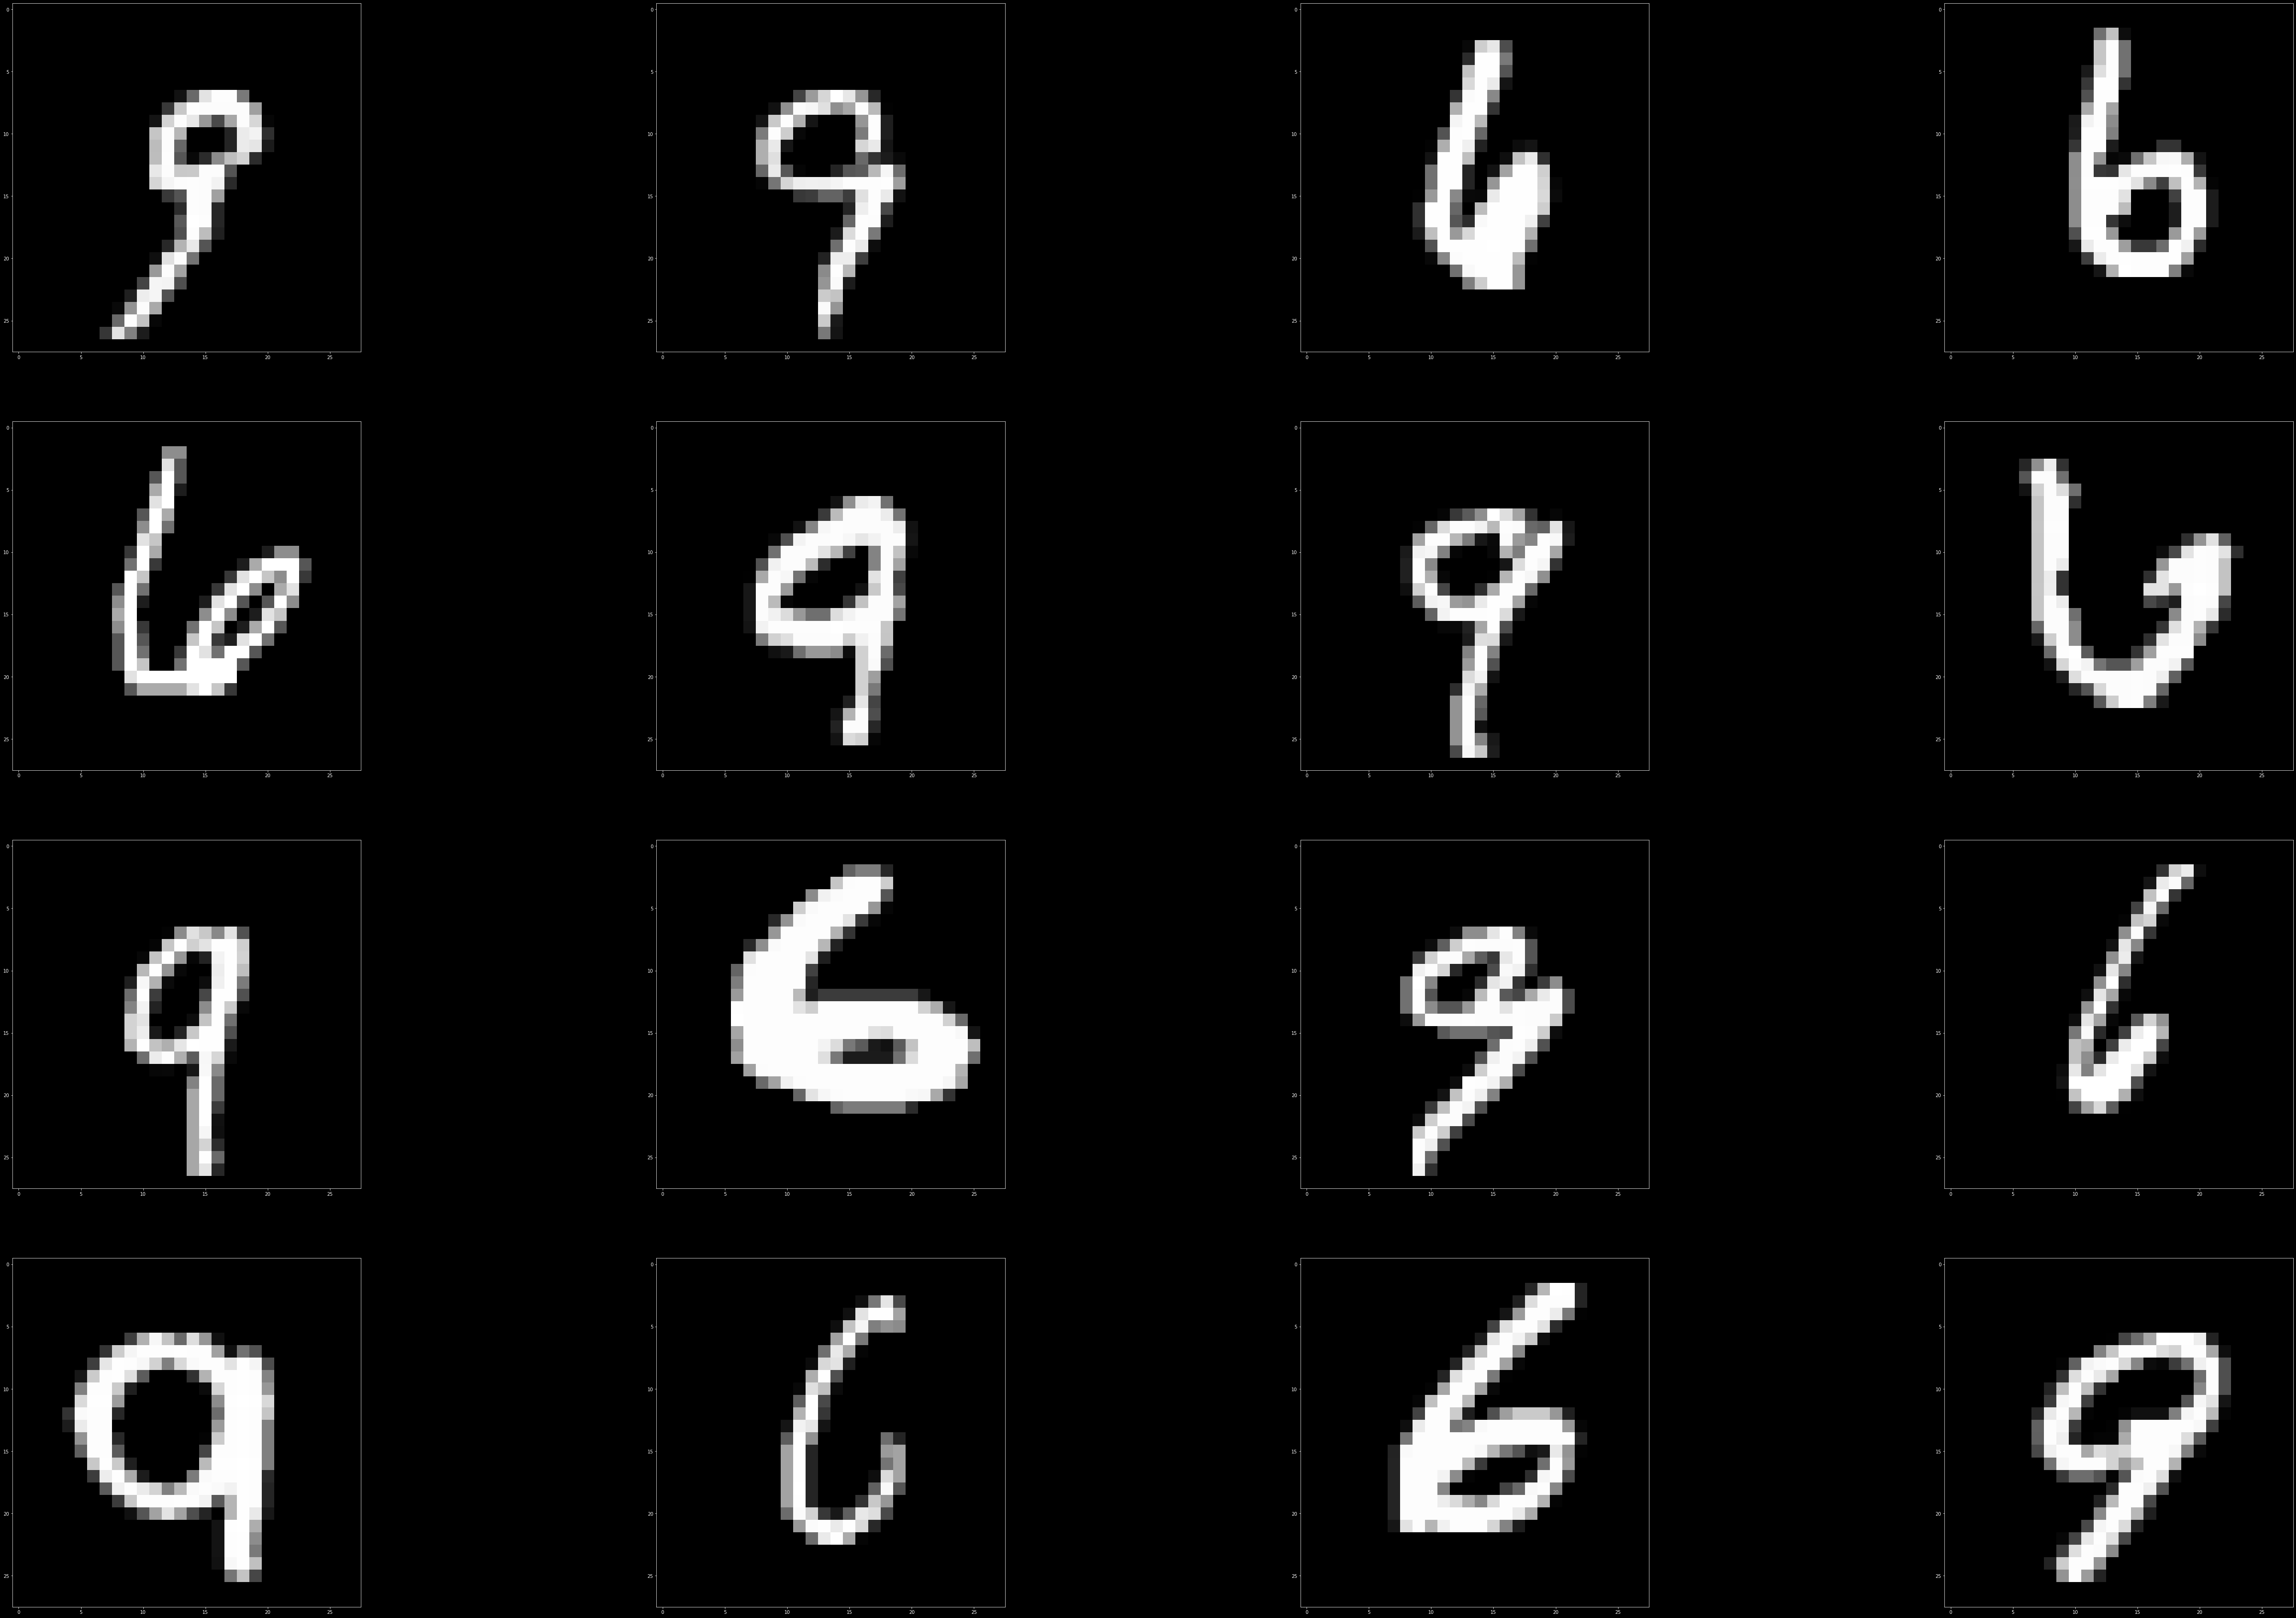

In [23]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()


i = 0
imgs = []
for l,v in data_train.iterrows():
        if v[0] in [6,9]:
                ar = v.as_matrix()[1:]
                ar = np.reshape(np.array(ar),(28,28))
                imgs.append(ar)
                i = i + 1
        if i == 16:
                break

show_images(imgs,cols=4)

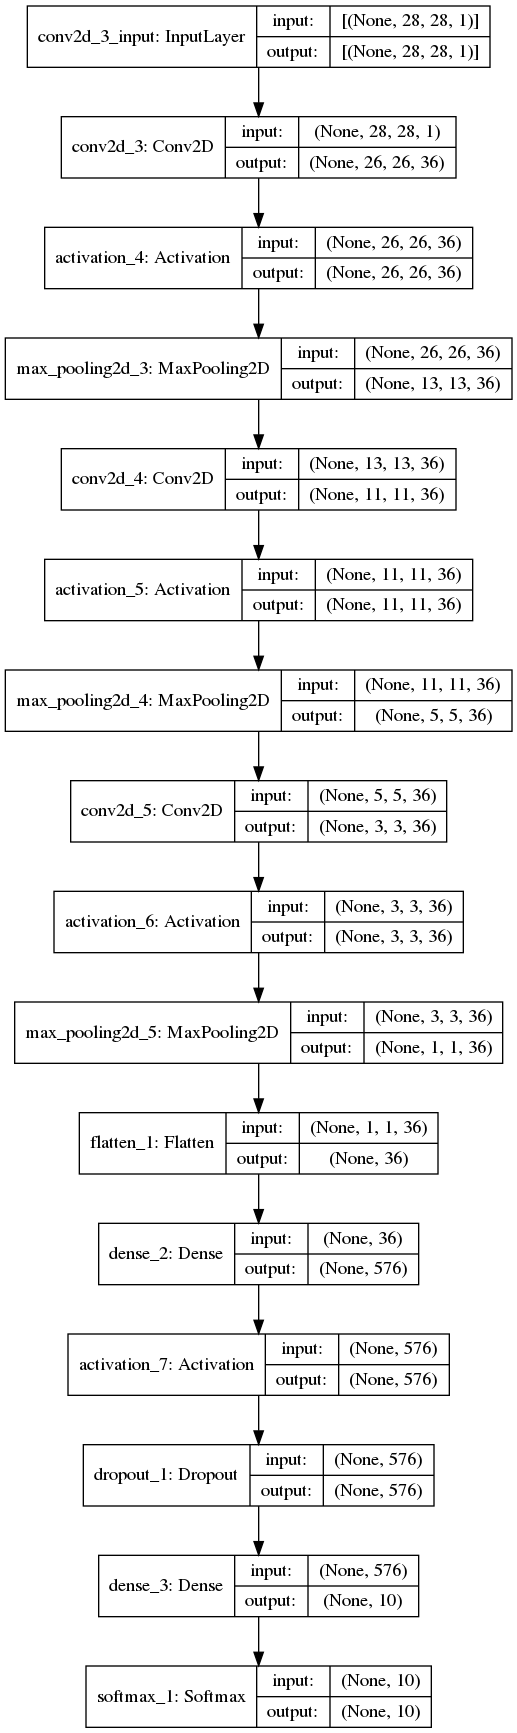

In [51]:
model = Sequential()
model.add(Conv2D(36,3,input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(36,3))
model.add(Activation("relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(36,3))
model.add(Activation("relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(576))
model.add(Activation("relu"))
model.add(Dropout(0.33))
model.add(Dense(10))
model.add(Softmax())
model.compile("Nadam",loss="categorical_crossentropy",metrics=["accuracy"])
plot_model(model, to_file='model.png',show_shapes=True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


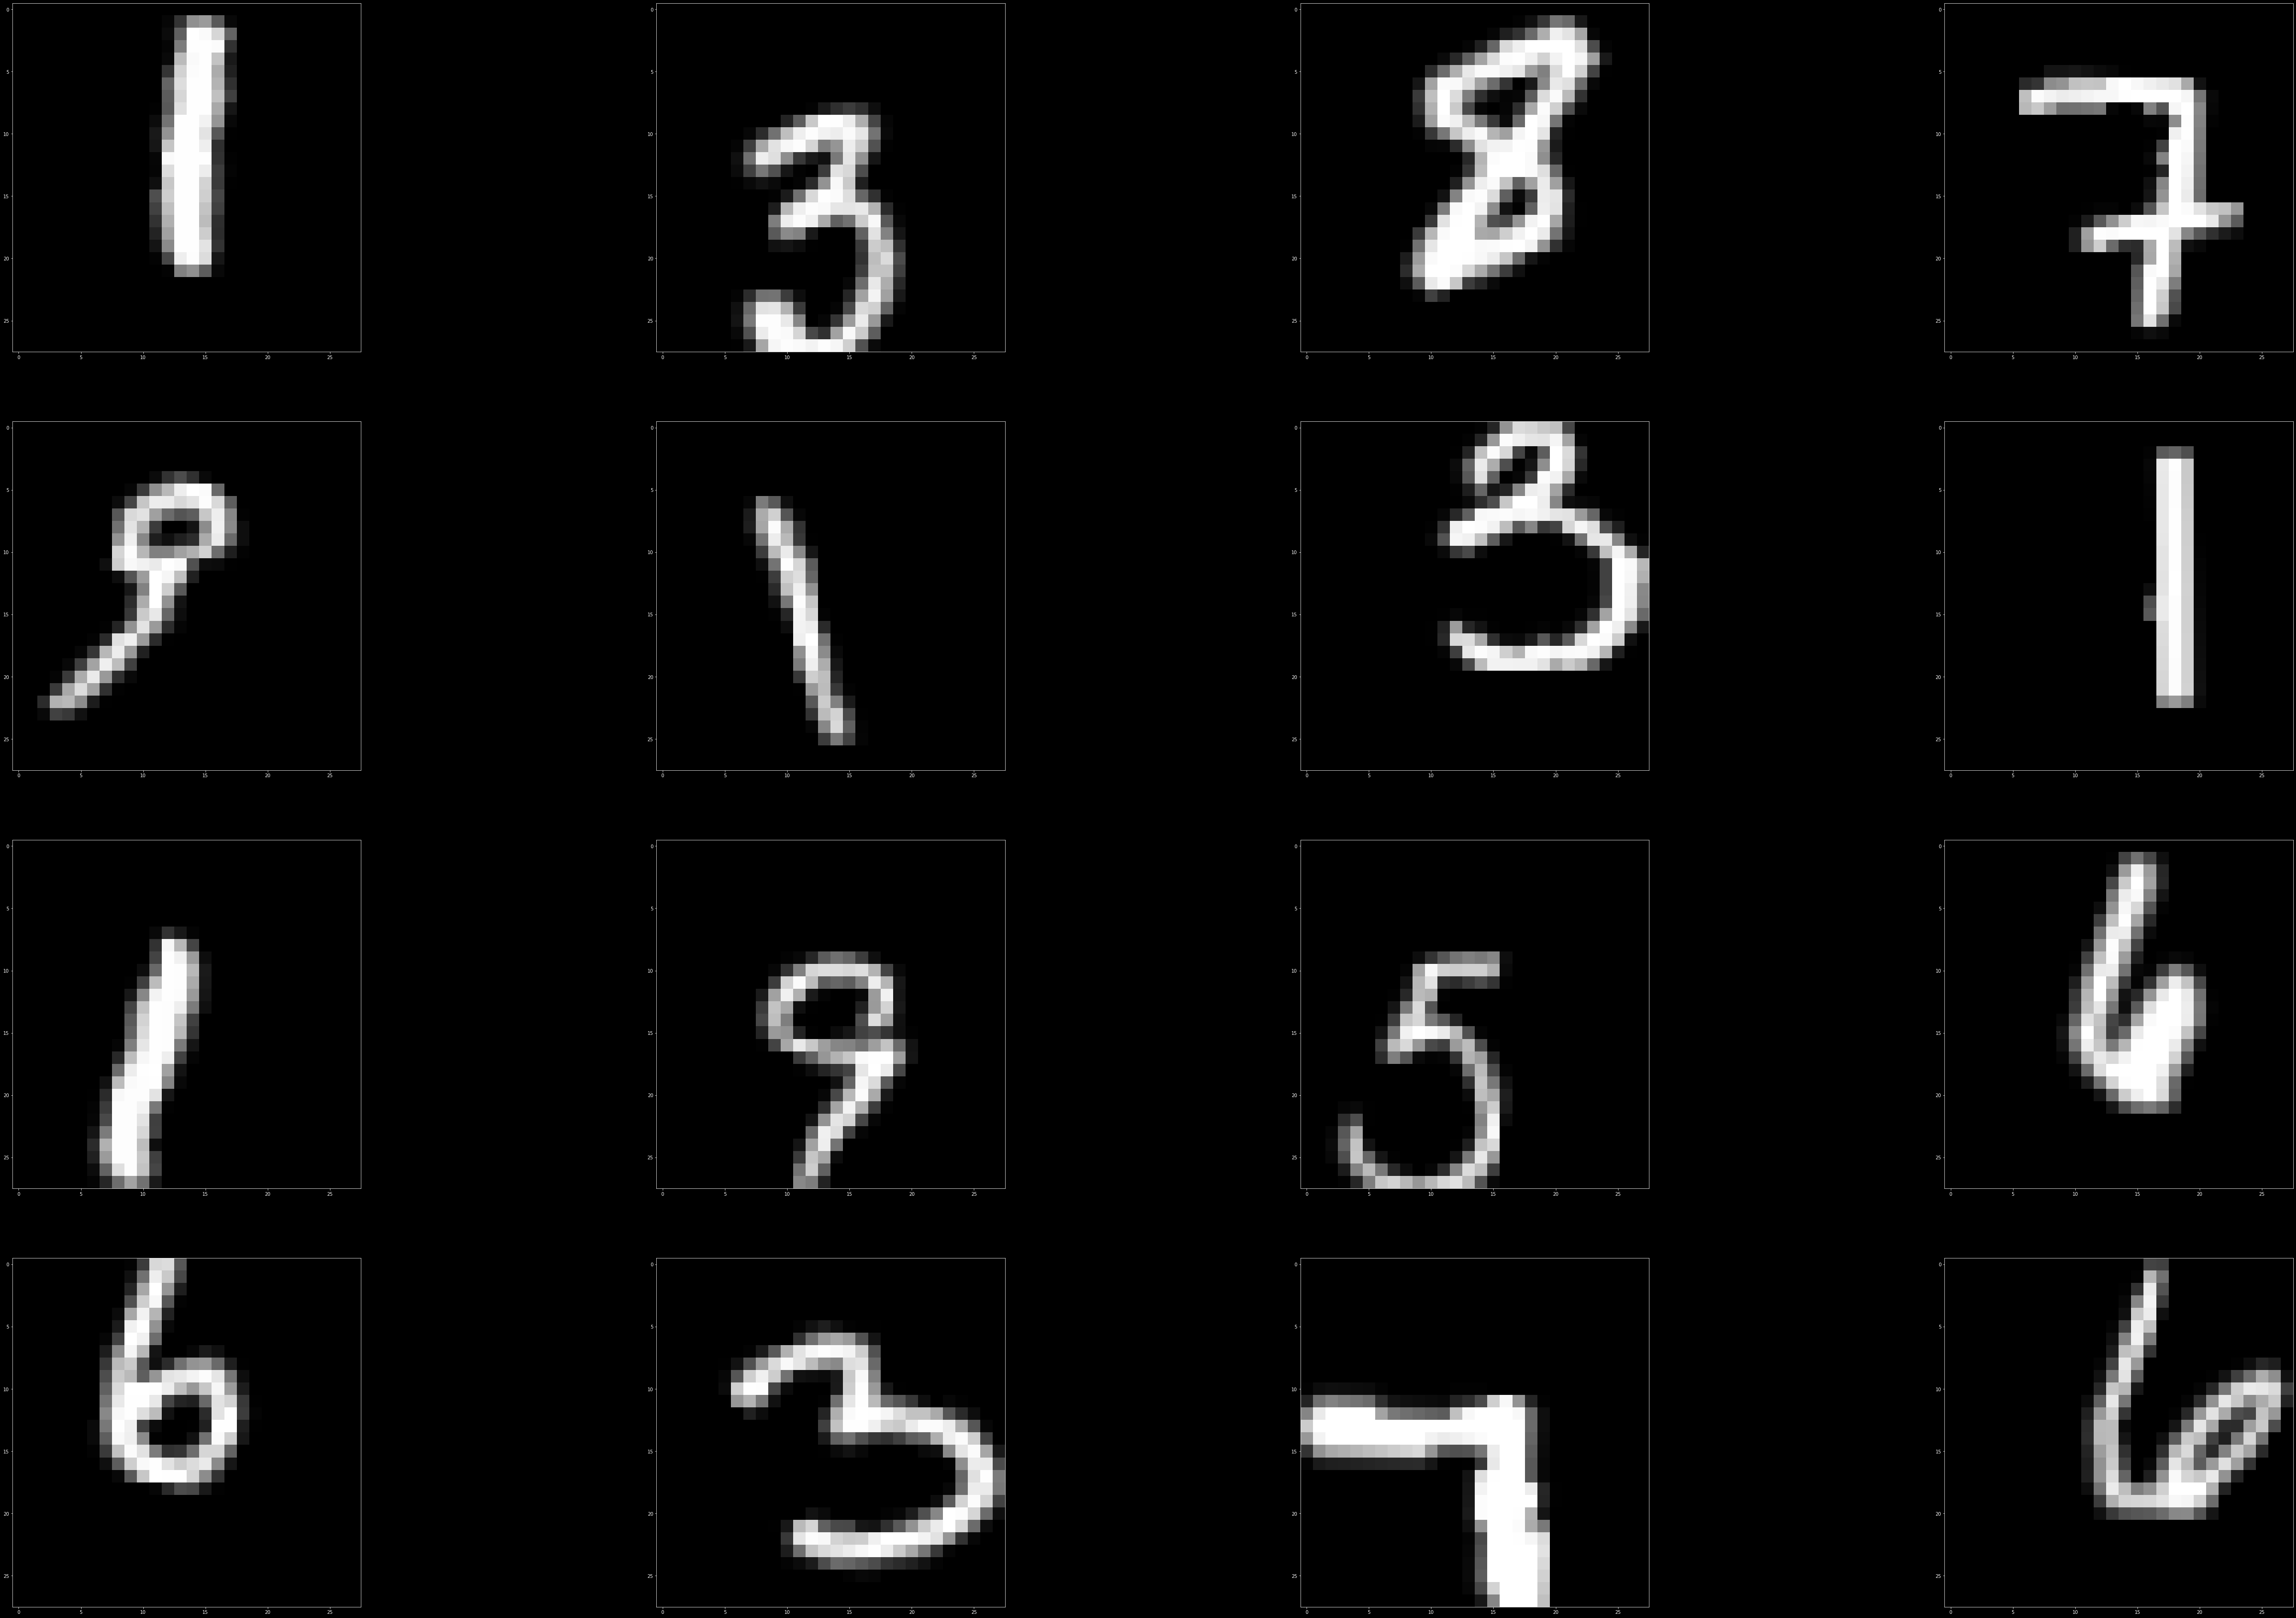

In [49]:
aug = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
	width_shift_range=0.2, height_shift_range=0.2,
    )

i = 0
imgs = []
for l,v in data_train.iterrows():
        if v[0]:
                if r.random()<0.1:
                    continue
                ar = v.as_matrix()[1:]
                ar = np.reshape(np.array(ar),(28,28,1))
                ar = aug.random_transform(ar)
                ar = np.reshape(ar,(28,28))
                imgs.append(ar)
                i = i + 1
        if i == 16:
                break

show_images(imgs,cols=4)

In [7]:
x_train = np.array([vec for vec in vectorize(data_train,label=True)])
y_train = np.array([vec for vec in labels(data_train)])
x_val = np.array([vec for vec in vectorize(data_val,label=True)])
y_val = np.array([vec for vec in labels(data_val)])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [8]:
# model = tensorflow.keras.models.load_model("modelfile")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


29399

In [52]:
t = time.time()
begin = 25
last = 100
model.fit_generator(aug.flow(x_train,y_train),epochs=last,verbose=2,validation_data=(x_val,y_val), 
    # use_multiprocessing=True,workers=7,
    initial_epoch=begin)

print("Training took",time.time() - t)

Epoch 1/100
919/919 - 12s - loss: 0.9616 - acc: 0.6752 - val_loss: 0.2493 - val_acc: 0.9260
Epoch 2/100
919/919 - 11s - loss: 0.4092 - acc: 0.8662 - val_loss: 0.1718 - val_acc: 0.9447
Epoch 3/100
919/919 - 11s - loss: 0.3350 - acc: 0.8938 - val_loss: 0.1663 - val_acc: 0.9481
Epoch 4/100
919/919 - 11s - loss: 0.2925 - acc: 0.9075 - val_loss: 0.1743 - val_acc: 0.9464
Epoch 5/100
919/919 - 11s - loss: 0.2667 - acc: 0.9170 - val_loss: 0.1340 - val_acc: 0.9582
Epoch 6/100
919/919 - 11s - loss: 0.2539 - acc: 0.9188 - val_loss: 0.1330 - val_acc: 0.9596
Epoch 7/100
919/919 - 11s - loss: 0.2488 - acc: 0.9208 - val_loss: 0.1512 - val_acc: 0.9529
Epoch 8/100
919/919 - 11s - loss: 0.2329 - acc: 0.9267 - val_loss: 0.1196 - val_acc: 0.9634
Epoch 9/100
919/919 - 11s - loss: 0.2284 - acc: 0.9282 - val_loss: 0.1148 - val_acc: 0.9664
Epoch 10/100
919/919 - 11s - loss: 0.2237 - acc: 0.9306 - val_loss: 0.1307 - val_acc: 0.9613
Epoch 11/100
919/919 - 11s - loss: 0.2129 - acc: 0.9334 - val_loss: 0.1140 - va

KeyboardInterrupt: 

In [50]:
model.save("modelfile")

In [14]:
test_data = pd.read_csv("test.csv")
x_test = np.array([vec for vec in vectorize(test_data,label=False)])
preds = model.predict_classes(x=x_test)

In [15]:
ids = [i for i in range(1,len(preds)+1)]
df = pd.DataFrame({"id":ids,"label":preds})
df.to_csv("testvals.csv",index=False)